# Plot when 3 gaussians are added
We use following code to form a final plot
```
for i in range(len(Mu)):
    Z = Z + weights[i] * multivariate_normal(Mu[i].ravel(), Sigma[i]).pdf(Pos)
```


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import linalg
from scipy.stats import multivariate_normal

## Intresting observation

Use of parametric equations of cirle to plot circles of different radius. The equation used are

$$x = a + r \cos t$$
$$y = b + r \sin t$$

In [29]:
def sigmaEllipse2D(mu, Sigma, radius=3, npoints=128):
    """
    SIGMAELLIPSE2D generates x,y-points which lie on the ellipse describing
    a sigma level in the Gaussian density defined by mean and covariance.

    Input:
        MU          [2 x 1] Mean of the Gaussian density
        SIGMA       [2 x 2] Covariance matrix of the Gaussian density
        RADIUS      Which sigma level curve to plot. Can take any positive value,
                    but common choices are 1, 2 or 3. Default = 3.
        NPOINTS     Number of points on the ellipse to generate. Default = 32.

    Output:
        XY          [2 x npoints] matrix. First row holds x-coordinates, second
                    row holds the y-coordinates. First and last columns should
                    be the same point, to create a closed curve.
    """
    phi = np.linspace(0, 2 * np.pi, npoints)
    x = np.cos(phi)
    y = np.sin(phi)
    z = radius * np.vstack((x, y))
    xy = mu + (Sigma*10).dot(z)
    return xy


def plot_sigma_levels(mu, P):
    xy_1 = sigmaEllipse2D(mu, P, 0.25)
    xy_2 = sigmaEllipse2D(mu, P, 0.5)
    xy_3 = sigmaEllipse2D(mu, P, 0.75)
    xy_4 = sigmaEllipse2D(mu, P, 1)
    xy_5 = sigmaEllipse2D(mu, P, 1.25)
    xy_6 = sigmaEllipse2D(mu, P, 1.5)

    plt.plot(xy_1[0], xy_1[1])
    plt.plot(xy_2[0], xy_2[1])
    plt.plot(xy_3[0], xy_3[1])
    plt.plot(xy_4[0], xy_4[1])
    plt.plot(xy_5[0], xy_5[1])
    plt.plot(xy_6[0], xy_6[1])
    plt.plot(mu[0], mu[1], "ro")


def plot_sigma_vector(Mu, Sigma):
    n = len(Mu)
    plt.figure(figsize=(12, 7))
    for i in range(n):
        plot_sigma_levels(Mu[i], Sigma[i])
    plt.tight_layout()
    # pml.savefig("mixgaussSurface.pdf")
    plt.show()


def plot_gaussian_mixture(Mu, Sigma, weights=None, x=None, y=None):
    if x == None:
        x = np.arange(0, 1, 0.01)
    if y == None:
        y = np.arange(-0.5, 1.2, 0.01)

    if len(Mu) == len(Sigma) == len(weights):
        pass
    else:
        print("Error: Mu, Sigma and weights must have the same dimension")
        return

    X, Y = np.meshgrid(x, y)
    Pos = np.dstack((X, Y))
    Z = 0

    for i in range(len(Mu)):
        Z = Z + weights[i] * multivariate_normal(Mu[i].ravel(), Sigma[i]).pdf(Pos)

    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(projection = '3d')
    ax.plot_surface(X, Y, Z, cmap="copper", lw=0.5, rstride=1, cstride=1)
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.tight_layout()
    # pml.savefig("mixgaussSurface.pdf")
    plt.show()



## Execution

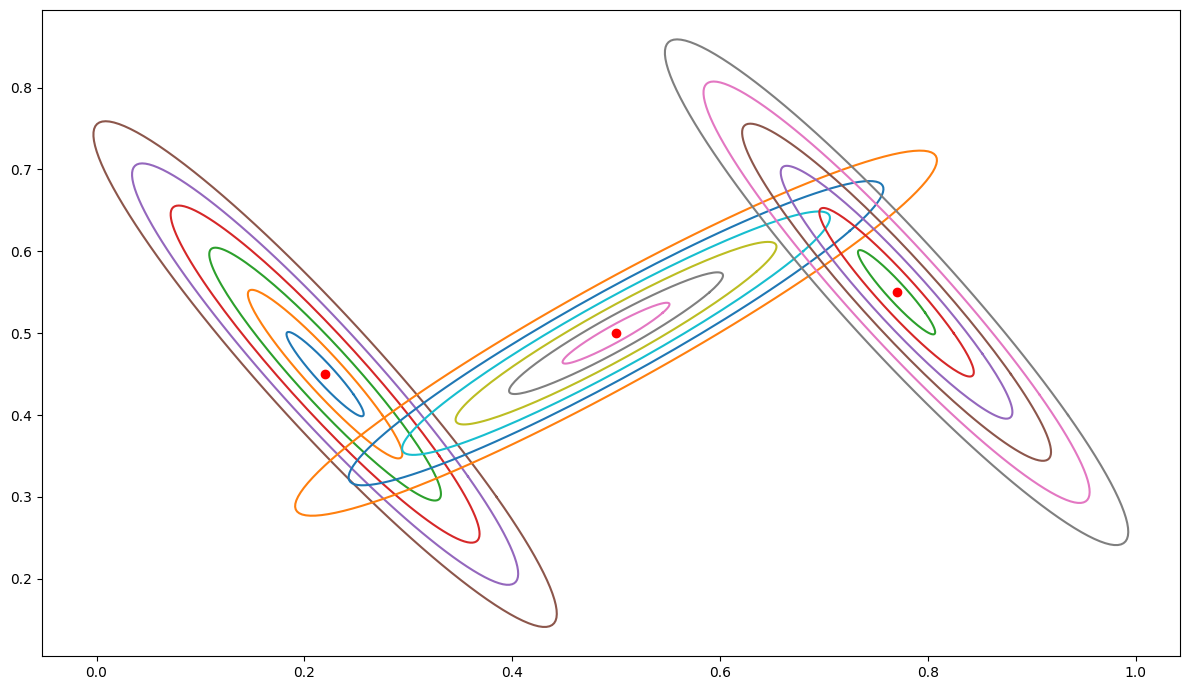

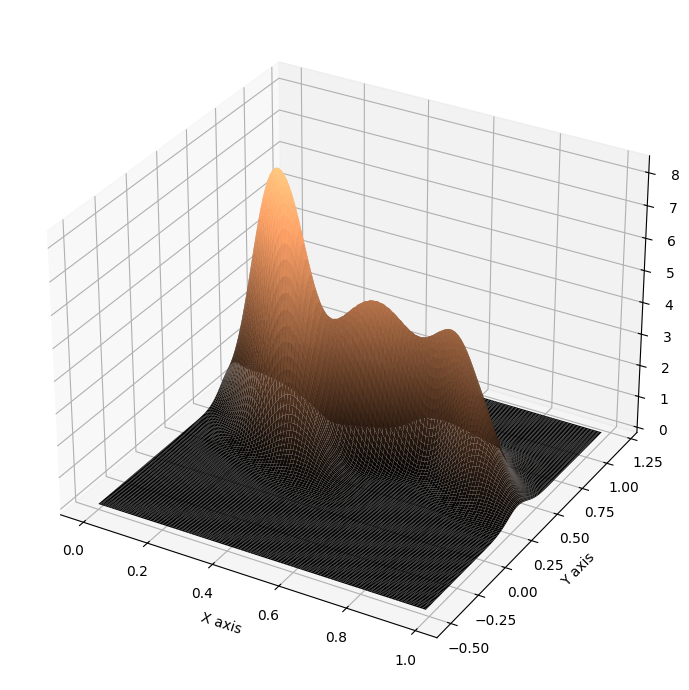

In [30]:
mu_1 = np.array([[0.22], [0.45]])
mu_2 = np.array([[0.5], [0.5]])
mu_3 = np.array([[0.77], [0.55]])
Mu = np.array([mu_1, mu_2, mu_3])

Sigma1 = np.array([[0.011, -0.01], [-0.01, 0.018]])
Sigma2 = np.array([[0.018, 0.01], [0.01, 0.011]])
Sigma3 = Sigma1
Sigma = np.array([Sigma1, Sigma2, Sigma3])
mixmat = np.array([[0.5], [0.3], [0.2]])
weights = [0.5, 0.3, 0.2]
plot_sigma_vector(Mu, Sigma)
plot_gaussian_mixture(Mu, Sigma, weights=weights)